# Binomial Distribution

In [1]:
from scipy import stats

In [6]:
stats.binom.cdf(2,4,1/2)

0.6875

In [7]:
stats.binom.pmf(2,4,1/2)

0.375

In [1]:
from math import comb,factorial
def binomial(x,n,p,q):
    return comb(n,x) * (p**x) * (q**(n-x))

In [2]:
binomial(2,4,1/2,1/2)

0.375

An agent sells life insurance policies to five equally aged, healthy people. According 
to recent data, the probability of a person living in these conditions for 30 years or 
more is 2/3. Calculate the probability that after 30 years:
1. All five people are still living.
2. At least three people are still living.
3. Exactly two people are still living.

In [4]:
n=5
p=2/3

In [8]:
#1
x = 5
stats.binom.pmf(x,n,p)

0.13168724279835387

In [9]:
#3
x = 2
stats.binom.pmf(x,n,p)

0.16460905349794244

In [10]:
#2
stats.binom.pmf(3,n,p) + stats.binom.pmf(4,n,p) + stats.binom.pmf(5,n,p)

0.7901234567901232

In [13]:
1 - stats.binom.cdf(2,n,p)

0.7901234567901234

In [14]:
for i in range(6):
    print(i, 'probability is:',stats.binom.pmf(i,n,p))

0 probability is: 0.004115226337448562
1 probability is: 0.041152263374485604
2 probability is: 0.16460905349794244
3 probability is: 0.32921810699588466
4 probability is: 0.32921810699588466
5 probability is: 0.13168724279835387


# Poison Distribution

1. In a cafe, the customer arrives at a mean rate of 2 per min. Find the probability of 
arrival of 5 customers in 1 minute

In [15]:
stats.poisson.pmf(5,2)

0.03608940886309672

2. If 3% of electronic units manufactured by a company are defective. Find the 
probability that in a sample of 200 units, less than 2 bulbs are defective.

In [16]:
stats.poisson.pmf(0,6) + stats.poisson.pmf(1,6) 

0.0173512652366645

In [17]:
stats.poisson.cdf(1,6)

0.01735126523666451

# Normal Distribution

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("diamonds.csv")

In [3]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### Normal Distribution:
    - In ND Mean and Median Both are equal.
    - ND Having Symmetrical curve.
    - ND os also Called Gaussian Distribution.
    - ND is following Emperical Rule.
- 68.45% of data lies in between $\mu \pm \sigma$
- 93% of data lies in between $\mu \pm 2\sigma$
- 99.73% of data lies in between $\mu \pm 3\sigma$


In [4]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [22]:
df['depth']

0        61.5
1        59.8
2        56.9
3        62.4
4        63.3
         ... 
53935    60.8
53936    63.1
53937    62.8
53938    61.0
53939    62.2
Name: depth, Length: 53940, dtype: float64

In [25]:
mu = df['depth'].mean()
sigma = df['depth'].std()

In [26]:
mu,sigma

(61.74940489432624, 1.4326213188337733)

C:\Users\kusumitha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='depth', ylabel='Density'>

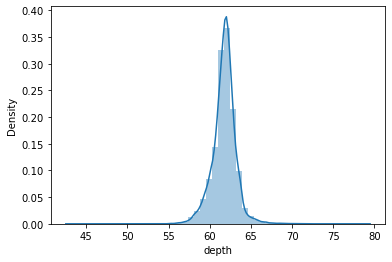

In [28]:
sns.distplot(df["depth"])

In [30]:
lb = mu - sigma
ub = mu + sigma
lb,ub

(60.316783575492465, 63.182026213160015)

In [31]:
df[(df['depth']>=lb) & (df['depth']<=ub)]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [32]:
40308 / len(df)

0.7472747497219132

In [33]:
lb = mu - 2*sigma
ub = mu + 2*sigma
lb,ub

(58.88416225665869, 64.61464753199378)

In [34]:
df[(df['depth']>=lb) & (df['depth']<=ub)]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [35]:
51120 / len(df)

0.9477196885428254

In [36]:
lb = mu - 3*sigma
ub = mu + 3*sigma
lb,ub

(57.451540937824916, 66.04726885082756)

In [37]:
df[(df['depth']>=lb) & (df['depth']<=ub)]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [39]:
53255 / len(df)

0.9873007044864665

$z= \frac{x -\mu}{ \sigma}$

In [40]:
df['z_depth']=(df['depth']-df['depth'].mean())/df['depth'].std()

In [41]:
int(df['z_depth'].mean())

0

In [43]:
df['z_depth'].var()

0.9999999999999151

C:\Users\kusumitha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='z_depth', ylabel='Density'>

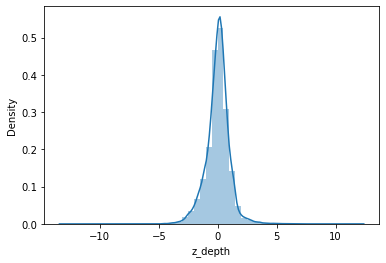

In [45]:
sns.distplot(df['z_depth'])

C:\Users\kusumitha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='depth'>

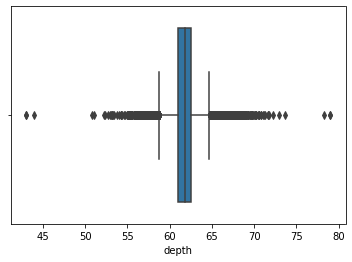

In [46]:
sns.boxplot(df['depth'])

In [47]:
from sklearn.preprocessing import StandardScaler

In [49]:
sc=StandardScaler()
sc.fit_transform(np.array(df['depth']).reshape(-1,1))

array([[-0.17409151],
       [-1.36073849],
       [-3.38501862],
       ...,
       [ 0.73334442],
       [-0.52310533],
       [ 0.31452784]])

In [50]:
df['z_depth']

0       -0.174090
1       -1.360726
2       -3.384987
3        0.454129
4        1.082348
           ...   
53935   -0.662705
53936    0.942744
53937    0.733338
53938   -0.523100
53939    0.314525
Name: z_depth, Length: 53940, dtype: float64

Most graduate schools of business require applicants for admission to take the Graduate Management Admission Council’s GMAT examination. Scores on the GMAT are roughly normally distributed with a mean of 527 and a standard deviation of 112. What is the probability of an individual scoring above 500 on the GMAT?

In [5]:
from scipy import stats

In [6]:
mean = 527
sd = 112
x = 500

z = (x - mean) / sd
z

-0.24107142857142858

p(x>500) = 1 - p(x<=500) = 1 - cdf

In [7]:
1 - stats.norm.cdf(z)

0.5952501217429682

### Probability that exactly students can score 400

In [9]:
mean = 527
sd = 112
x = 400

z = (x - mean) / sd
z

-1.1339285714285714

In [10]:
stats.norm.pdf(z)

0.20975071270635803

### more than 400

In [11]:
1 - stats.norm.cdf(z)

0.871587744409162

### till 400

In [12]:
stats.norm.cdf(z)

0.12841225559083802

### Probabilty that in between 415 to 639

In [13]:
x1 = 415
x2 = 639
mean = 527
sd = 112

z1 = (x1 - mean) / sd
z2 = (x2 - mean) / sd

In [14]:
stats.norm.cdf(z2) - stats.norm.cdf(z1)

0.6826894921370859

2. The length of human pregnancies from conception to birth approximates a normal 
distribution with a mean of 266 days and a standard deviation of 16 days. What proportion 
of all pregnancies will last between 240 and 270 days (roughly between 8 and 9 months)?

In [12]:
mean = 266
sd = 16
x1 = 240
x2 = 270
z1 = (x1 - mean) / sd
z2 = (x2 - mean) / sd

In [13]:
stats.norm.cdf(z2) - stats.norm.cdf(z1)

0.5466250462677041